# Introduction to Version Control with GIT

## Introduction

**Version control** is a system which:

- records all files that make up a project (down to the line) over time
- tracks their development
- provides the ability to recall previous versions of files.
- facilitates collaborative editing of files by different parties. 

This type of system is essential for ensuring reproducibility of scientific research

Why should I care obout version control? Probably most of us have at some point in their career (some earlier, some later) come across as situation where they had to write document that evolved over time.It starts out simple, than more and more content comes in, often content needs to be reorganized, certain parts will be deleted or moved to other places. Changes introduced are reverted and changed in a different way etc. More often than not one wishes to travel back in time to an earlier stage in the history of the project. 


There are a number of popular tools for version control, the particular tool we will use is **git**.

A "poor man's version control" system is shown in this directory listing:

```shell
ls ~/poor_VC

paper_final.tex         paper_v2_richard.tex
paper_really_final.tex  paper_v2.tex
paper.tex               paper_v3_with_richards_comments.tex
paper_v1.tex
```

GIT does away with different file names for different versions. You will always see the same filename in your projects directory. Git will save snapshots of all (tracked) files on request and you will be able to navigate back an forth through the history that any tracked file went through. Moreover, you *branch* off
to test a new idea, switch back to the original branch (called the *master*) and merge branches that you or a collaborator created. One such git workflow is depicted below:

![image.png](https://git-scm.com/book/en/v2/images/basic-merging-2.png)

Source: https://git-scm.com/book/en/v2

In this example, the developer started to work on a file and created three snapshots (*commits* in git-speak): C0, C1, C2. She then wants to try out a new, highly experimental feature that she is not sure if it will break the code. So she creates a new branch (iss53) and commits C3 to it.
Then, she reckognizes that something must be changed in the main line of development, so she switches back to the master branch and commits C4.
Again back to the feature branch *iss53* and commit C5. At this point, she wants to integrate the new feature from branch *iss53* into the *master* branch. The merge
point becomes a new *commit*, C6. And so forth. At no point did she have to rename or backup her files, everything is handled by git.

The git version control system can be thought of as a iterative workflow where paper documents move between various places:

![git cycle](https://git-scm.com/book/en/v2/images/lifecycle.png)

- The modified state: The document is on our desk before us and we edit (write) it.
- Staged: When our task on the document is done or we have to work on sth else, we put the file into a shelf that has a label "Keep" on it. It can be thought of as a stash of documents that we need to keep within reach but are not actively working on it. From that stash, we can easily pull the document back to our desk and continue working on it.
- Committed: At some point, we would like to take a snapshot of the document, so we can re-open precisely the current state at a later point in time. In a paper world, we would take the stash of documents to the copy machine, make a copy from each document and put the copy into a file cabinet, tagged with a date, our name, and a remark telling us what the change of this copy with respect to the previous copy is. The original document is now in a "unmodified" state (with respect to the last backup copy). 

We then take the document back to our desk and continue working on it: It is then again in the "modified state".
 

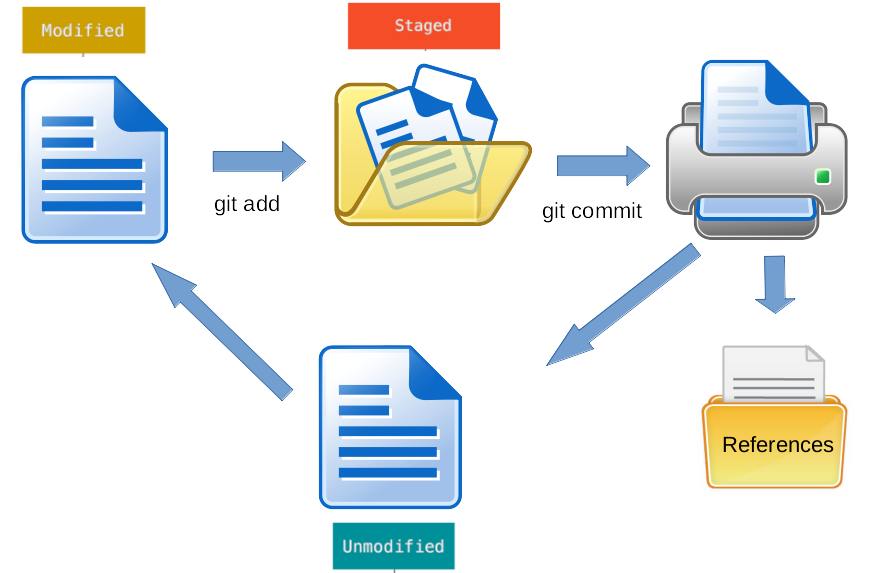

# Setting up git

Initially we need to set up git. 

git keeps track of the entire history of a project. This does not only mean keeping track of what was done but also who did it. So we start by telling git who we are by running the following two commands:

```shell
$ git config --global user.name "Your Name"
$ git config --global user.email "Your Email"
```

**Note** this is not data that is being collected by any cloud service or similar. It just stays with your project.

**Windows**
Note that all these commands work on the anaconda prompt but if you want to use tab completion you can use the git bash command line specifically for git.


Moreover, we are going to set [Nano](https://www.nano-editor.org) as the default editor for git. For unix you can use the following command:

```shell
$ git config --global core.editor "nano"
```

We are going to use Nano later in order to write a commit message.


## Exercise:
1. Configure your `git` installation as shown above. Set your name, email, and preferred editor.
1. Lookup the documentation for the `git config`. Find out how to list the current global git configuration.
1. List the current global git configuration and confirm that your user name, email and preferred editor are setup correctly.
```

## Solutions:
1. Configure git
```shell
$ git config --global user.name "First Last"
$ git config --global user.email "last@evolbio.mpg.de"
```

1. `git-config` documentation
```shell
$ git config -h
```
prints the usage instructions to the terminal:
```
    usage: git config [<options>]

    Config file location
        --global              use global config file
        --system              use system config file
        --local               use repository config file
        --worktree            use per-worktree config file
        -f, --file <file>     use given config file
        --blob <blob-id>      read config from given blob object

    Action
        --get                 get value: name [value-regex]
        --get-all             get all values: key [value-regex]
        --get-regexp          get values for regexp: name-regex [value-regex]
        --get-urlmatch        get value specific for the URL: section[.var] URL
        --replace-all         replace all matching variables: name value [value_regex]
        --add                 add a new variable: name value
        --unset               remove a variable: name [value-regex]
        --unset-all           remove all matches: name [value-regex]
        --rename-section      rename section: old-name new-name
        --remove-section      remove a section: name
        -l, --list            list all
        -e, --edit            open an editor
        --get-color           find the color configured: slot [default]
        --get-colorbool       find the color setting: slot [stdout-is-tty]

    Type
        -t, --type <>         value is given this type
        --bool                value is "true" or "false"
        --int                 value is decimal number
        --bool-or-int         value is --bool or --int
        --path                value is a path (file or directory name)
        --expiry-date         value is an expiry date

    Other
        -z, --null            terminate values with NUL byte
        --name-only           show variable names only
        --includes            respect include directives on lookup
        --show-origin         show origin of config (file, standard input, blob, command line)
        --default <value>     with --get, use default value when missing entry
```

1. List the git configuration
```shell
$ git config --global --list
user.name=Carsten Fortmann-Grote
user.email=grotec@evolbio.mpg.de
filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
diff.tool=vimdiff
core.editor=vim
```





# Initialising a git repository

In order to demonstrate how version control with git works we are going to use the `rsd-workshop` folder we created before.

We need tell git to start keeping an eye on this repository (folder/project). While in the `rsd-workshop` directory type:

```shell
$ git init
```

You should then see a message saying that you have successfully initialized a git repository.

## Exercise
1. Change into your directory `rsd-workshop` and initialize it as a git repository.

# Staging and committing changes

To see the status of the repository we just initialized type:
 
```shell
$ git status
```

We should see something like:

![](static/git_status.png)

There are various pieces of useful information here, first of all that `addition.py`, `if-statement.py` and `while-loops.py` are not currently tracked files.

We are now going to track the `addition.py` file:

```shell
$ git add addition.py
```

If we run git status again we see:

![](static/git_status_after_add.png)

We have propagated our file from the "Untracked" to the "Staged" status.  
![image.png](static/staged.png)

So the `addition.py` file is now ready to be "committed".

```shell
$ git commit
```

When doing this, a text editor should open up prompting you to write what is called a commit message. In our case the text editor that opens is Nano. 

For the purposes of using git Nano is more than a sufficient editor, all you need to know how to do is:

- Write in Nano: just type;
- Save in Nano: Ctrl + O;
- Quit Nano: Ctrl + X.


Type the following as the first commit message:

```shell
Add addition script

Addition script contains a function which adds two numbers.
```

save and exit.

git should confirm that you have successfully made your first commit.


![](static/git_commit.png)


**Note** A commit message is made up of 2 main components:

```shell
<Title of the commit>

<Description of what was done>
```

- The title should be a description in the form of "if this commit is applied `<title of the commit>` will happen". The convention is for this to be rather short and to the point.
- The description can be as long as needed and should be a helpful explanation of what is happening.

A commit is a snapshot that git makes of your project, you should use this at meaningful steps of the progress of a project.

Now, our file is in the "Unmodified" state, because it is identical to the _copy_ that we filed away to our "file cabinet" (the location where git stores the snapshots).

![image.png](static/unmodified.png)

## Exercise:
1. Add and commit the file `addition.py` to git. Write a short but telling commit message.

# Ignoring files

There are still two files in the repository that are currently not being tracted. These are `if-statement.py` and `while-loops.py`. 

We do not want to keep tract of those files as they are not related to our project.

To tell git to ignore these files we will add them to a blank file entitled `.gitignore`.

Open your editor and open a new file (`File > New file`) and type:

```shell
if-statement.py
while-loops.py
```

Save that file as `.gitignore` and then run:

```shell
$ git status 
```

We see now that `git` is ignoring those 2 files but is aware of the `.gitignore` file.

## Exercise:
1. Add and commit the file `.gitignore` to git. Give a good commit message.
1. Confirm that you have a clean working directory.

## Solution:
```shell
$ git add .gitgignore
$ git commit
$ git status
```


Now if we run `git status`, we see a message saying that everything in our repository is tracked and up to date.

# Tracking changes to files


Let's assume that we want to refactor (a fancy way of saying "change") the function `add_two_numbers` to `add_two_even_numbers` such that the function adds two even numbers but prints a warning if not both numbers are even.

## Exercise:
1. Change the file `addition.py` to look like this:

```python
# addition.py
def add_two_even_numbers(a, b):
    if a % 2 == 0 and b % 2 == 0:
        return a + b
    else:
        print("Please use even numbers.")
    
print(add_two_even_numbers(4, 6))
```

1. Save your file and confirm that git detects the change in one file.

```shell
$ git status
```

## Solution:
![](static/modified.png)

Our file is now in the modified state, as `git status` tells us.  

![image.png](static/to_modified.png)

To see what has been modified you need to type:

```shell
$ git diff addition.py
```
and press `q` to exit.


To "stage" the file for a commit we use `git add` again:

```shell
$ git add addition.py
```

Now let us commit:

```shell
$ git commit
```

With the following commit message:

```
Change add two numbers function to add two even numbers
```

Finally, we can check the status: 
```shell
$ git status
```
to confirm that everything has been done correctly.    

# Exploring history

`git` allows us to visualize the history of a project and even to change it. To view the history of a repository type:

```shell
$ git log
```

This displays the full log of the project:

![](static/git_log.png)


We see that there are 3 commits there, each with a seemingly random set of numbers and characters. This set of characters is called a "hash".

The first commit with title `adds addition script` has hash: aab73629642568b9be5ca5faa5e091ea9a629d67.

**Note** that on your machines this hash will be different, in fact every hash is mathematically guaranteed to be unique, thus it is uniquely assigned to the changes made.

Hashes can be very useful, e.g. to re-create an earlier state of the project.

## Time travel: Checking out a (previous) commit

The `git checkout` commands allows us to revert our file(s) to a state from an earlier commit.
Let's try this out and check out the commit just before we made the last change.
Find the commit hash to revert to from `git log` first. Highlight the hash and copy it (Ctrl-C). Then paste into the `git checkout` command. It's actually sufficient to take only the first 8 characters from the hash. Remember that your hash will look different from the example.

```shell
$ git checkout fbb2cd03
```

The message about "detached HEAD" means that our file(s) have now reverted to a state from an earlier commit. Any changes to our files would not be commited directy
back to our branch (more about branches further below).

The history reported by `git log` now contains only the commits before the checked out commit as you can see by running

```shell
$ git log
```

Open the file `addition.py` and confirm that it is again in the state before we changed `add_two_numbers()` to `add_two_even_numbers()`.

## Check out the tip of the branch (aka HEAD)

To go back to the "tip of the branch" (the state where we left from before checking out an earlier commit) we run

```shell
$ git checkout master
```

Confirm we are back on the master branch:

```shell
$ git status
```

Check the history:

```shell
$ git log
```

## Exercise:
1. Checkout the previous commit.
1. Confirm that you are on the targeted commit.
1. Check that the file `addition.py` contains the ancient code, i.e. before we refactored the code to handle odd and even numbers seperately.
1. Go back to the tip of the `master` branch.

# Creating branches

Branches allow us to work on different versions of the same file in parallel, which is very important when developing software, but also when we do research.

When typing `git status` we have seen that one piece of information regularly given was:

```shell
On branch master
```

This is telling us which branch of "history" we are currently on. We can view all branches with the command:

```shell
$ git branch
```

This shows:

```
* master
```


So currently there is only one branch called master.

## Exercise: 
1. Create a new branch called `implement-add-odd-numbers`.
1. Confirm that the new branch has been created.
1. Switch ("checkout") to the new branch.
1. Confirm that you are on the new branch.

## Solutions:
1. Create branch
    ```shell
    $ git branch implement-add-odd-numbers
    ```  
    
1. Check branches:
    ```
    $ git branch
    implement-add-odd-numbers
    * master
    ```

1. Switch to the new branch
    ```shell
    $ git checkout implement-add-odd-numbers
    ```
    
1. Check branch
    ```shell
    git branch
    * implement-add-odd-numbers
    master
    $ git status
    ```

# Implement a feature in the new branch
While we are on this branch we are going to add a new function in the `addition.py` and that is a function that adds two odd numbers.

## Exercise:
1. Add the following code to `addition.py`:

    ```python
    def add_two_odd_numbers(a, b):
        if a % 2 != 0 and b % 2 != 0:
            return a + b
        print("Please use odd numbers.")

    print(add_two_odd_numbers(1, 3))

    ```

1. Add and commit the changes to git.
1. Checkout the master branch and confirm thate "addition.py" is in the old state.
1. Switch back to the brach `implement-add-odd-numbers` and confirm the new change has been played back.

## Solutions:
1. Open "addition.py" in your editor and apply the changes.

1. Add and commit.
```shell
$ git add addition.py
$ git commit 
```
  
1. Checkout master
```
$ git checkout master
```
    
1. List the code in a pager.
```shell
$ less addition.py
```

1. Checkout new branch.
```shell
$ git checkout implement-add-odd-numbers
$ less addition.py
    ```
        


###  Merging locally
The `git merge` command integrates changes from a branch into the currently checked out branch. Before merging, make sure to have checked out 
the target branch. In our example we merge changes from the "implement-add-odd-numbers" branch into the "master" branch.

Before merging, always make sure you are on the *target* branch:

```shell
$ git checkout master

Switched to branch 'master'
```

Now use the `git merge` command to bring in the changes from the "implement-add-odd-numbers" branch.
It is good practice to always append the `--no-ff` flag to `git merge` to create a dedicated merge commit. In this way one can later identify changes in the code that are a result from a merge.

```shell
$ git merge implement-add-odd-numbers --no-ff 
```

In your editor, the commit message will already be present, you can leave it as is or add more detailed information. Save and close the editor.

## Exercise:
1. Confirm that the changes from the branch `implement-add-odd-numbers` are properly merged into the master branch.

## Solutions:
1.
```
$ git log
```

Pro tip: To visualize the tree structure of branches and commits, use the following `git log` command:

```shell
$ git log --pretty=oneline --graph --abbrev-commit

*   c1ba40d (HEAD -> master) Merge branch 'implement-add-odd-numbers'
|\  
| * fadd60e (implement-add-odd-numbers) implement function for adding odd numbers
|/  
* d80f1c9 change add two numbers function to add two even numbers
* 3fca9d1 Add .gitignore
* 8487ec4 Add addition script
```

### Delete feature branch 
If we are certain that the feature branch `implement-add-odd-numbers` will no longer be used, we can delete it:

```shell
$ git branch -D implement-add-odd-numbers
```

## Exercise:
1. Confirm that the feature branch is deleted.

## Solution:
```shell
$ git branch
```

# Conclusions

This is the end of Day 1 of our workshop. Here's what you learned today:

* Using the command line to navigate the directory tree and create directories.
* First steps in python programming
* Using git for version control: 
    - The git cycle: `add`, `commit`, `push`
    - Going back and forth in history
    - Branching: list, create, merge, delete

# Outlook
On day 2 of the workshop, we will cover:
* Best practices for software development: Documentation and testing
* Git in the cloud: GitLab, Merge requests, `git push` and `git pull`
* Continuous integration: Automated testing
* Gitlab pages: Publish your online reference manual